<a href="https://colab.research.google.com/github/ProfAI/machine-learning-fondamenti/blob/main/4%20-%20Overfitting%20e%20Tecniche%20di%20Regolarizzazione/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tecniche di Regolarizzazione

In [3]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
RANDOM_SEED = 0

In [5]:
def evaluate_model(model, dataset):

  X, y = dataset

  y_pred = model.predict(X)

  print(f"MSE: {mean_squared_error(y, y_pred):.3f}")
  print(f"R2: {r2_score(y, y_pred):.3f}")

In [6]:
X, y = make_regression(n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, tail_strength=0.5, noise=10.0, random_state=RANDOM_SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED)

In [7]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Ordinary Least Regression

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
evaluate_model(lr, (X_train, y_train))

MSE: 0.000
R2: 1.000


In [10]:
evaluate_model(lr, (X_test, y_test))

MSE: 12174.486
R2: 0.216


### Ridge Regression
Regolarizzazione L2

In [11]:
from sklearn.linear_model import Ridge

In [12]:
model = Ridge(alpha=1) #parametro di regolarizzazione
model.fit(X_train, y_train)

Ridge(alpha=1)

In [13]:
evaluate_model(model, (X_train, y_train))

MSE: 6.870
R2: 1.000


In [14]:
evaluate_model(model, (X_test, y_test))

MSE: 11894.633
R2: 0.234


La regolarizzazione L2 sta portando ad underfitting

### Lasso Regression
Regolarizzazione L1

In [15]:
from sklearn.linear_model import Lasso

In [16]:
model = Lasso(alpha=1.)
model.fit(X_train, y_train)

Lasso()

In [17]:
evaluate_model(model, (X_train, y_train))

MSE: 59.894
R2: 0.996


In [18]:
evaluate_model(model, (X_test, y_test))

MSE: 93.840
R2: 0.994


In questo caso le metriche sono buone

La L2 non va bene in questo caso perchè la L1 ci permette di eseguire una selezione delle features, quelle che non dovrebbero contenere molta informazione per la costruzione del modello vengono portate a 0.
In questo caso abbiamo 100 features ma soltanto 10 sono significative per il modello, quindi la L1 ci permette di eliminare le 90 features non significative.


### Learning curve

In [19]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

train_sizes_abs, train_scores, test_scores = learning_curve(Lasso(), X, y, random_state=RANDOM_SEED)

/Users/andrea/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+01, tolerance: 1.044e+01
  model = cd_fast.enet_coordinate_descent(
/Users/andrea/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.148e+01, tolerance: 4.230e+01
  model = cd_fast.enet_coordinate_descent(


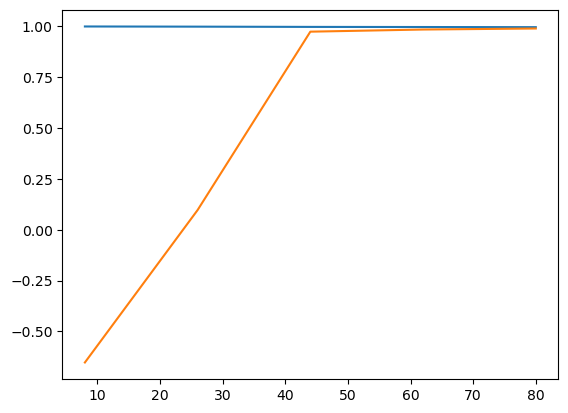

In [20]:
plt.plot(train_sizes_abs, train_scores.mean(axis=1))
plt.plot(train_sizes_abs, test_scores.mean(axis=1))
plt.show()